## Read House Price data and perform exploratory data analysis.
## Apply Principle Component Analysis

In [1]:
# Import necessary packages

In [2]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA 

In [3]:
# load data
df = pd.read_csv('houseprice.csv')

# EDA

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
for i in df:
    print(i, df[i].isnull().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [7]:
## Since the focus is on the PCA technique, we will drop the non-numerica variables. Remember 'origin' is categorical.

In [8]:
cat = df.select_dtypes('object')

In [9]:
for i in df.select_dtypes('object'):
    df.drop(i, inplace = True, axis = 1)
    

In [10]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [11]:
cat.shape

(1460, 43)

### Treating Missing values

In [12]:
df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [13]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)

In [14]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace = True)

In [15]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace = True)

## Understanding dependent variable

<AxesSubplot:>

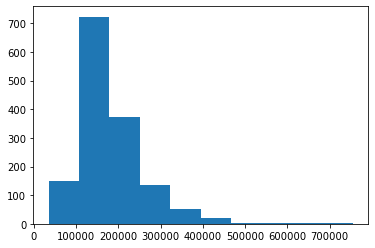

In [17]:
df['SalePrice'].hist(grid = False)

In [ ]:
# The Sales Price (dependent variable is not normally distributed)

In [18]:
df['Log_SalePrice'] = np.log(df['SalePrice'])

<AxesSubplot:>

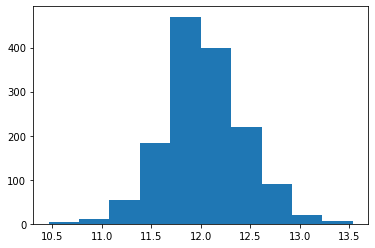

In [19]:
df['Log_SalePrice'].hist(grid = False)

In [ ]:
# But logarithm of dependent variable is normally distributed. So, considering log transformation will improve the performance of the model

## Defining x and y

In [20]:
x = df.drop(['SalePrice','Id', 'Log_SalePrice'], axis = 1)
y = df['Log_SalePrice']

## Performing scaling technique

In [21]:
from scipy.stats import zscore
XScaled=x.apply(zscore)
XScaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


## Covariance matrix

In [ ]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)
print(covMatrix.shape)

In [23]:
pca = PCA(n_components=36)
pca.fit(XScaled)

PCA(n_components=36)

In [ ]:
print(pca.explained_variance_)

In [ ]:
print(pca.components_)

In [ ]:
print(pca.explained_variance_ratio_.sum())

In [24]:
c=1
for i in pca.explained_variance_ratio_:
    print(i, c)
    c+=1

0.19812104668235953 1
0.08900578365174738 2
0.07148966395277456 3
0.05616648025584463 4
0.04103891233183918 5
0.03314483685303415 6
0.031996028766482554 7
0.031466969287964934 8
0.030775102662339893 9
0.030161132318424863 10
0.02907150685343586 11
0.02835570386775408 12
0.028082413268607276 13
0.026546264564412708 14
0.025478618252990633 15
0.02495532354963363 16
0.023465929313124075 17
0.022569059865183975 18
0.02177661960856819 19
0.020457065461655925 20
0.018695925790734334 21
0.017339197946495993 22
0.016303794516147156 23
0.01500441145024991 24
0.011940746052833861 25
0.010812453950559048 26
0.008703610253444025 27
0.007805526659911747 28
0.007132391171040403 29
0.006660149211527885 30
0.005388631731898551 31
0.003962202635915623 32
0.0035005828468270225 33
0.00262591441423646 34
3.907248705729512e-32 35
5.9943025636849326e-33 36


In [ ]:
# From above code we can decide the number of components
# I have considered 26 columns out of 36 columns 
# Reason is after first 26 columns, the explained variance ratio goes below 0.01

In [25]:
pca3 = PCA(n_components=26)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[-1.62880985e-02  1.61076665e-01  1.06869554e-01  3.01748867e-01
  -8.33990362e-02  2.37722943e-01  2.08699877e-01  1.95979101e-01
   1.40427587e-01 -1.23732259e-02  1.16725306e-01  2.59011605e-01
   2.57041201e-01  1.33689803e-01 -1.08400439e-02  2.99157315e-01
   7.46529537e-02 -1.30012514e-02  2.61823684e-01  1.26036339e-01
   1.12726596e-01 -1.71975717e-02  2.40360873e-01  1.83386059e-01
   2.21045092e-01  2.83261792e-01  2.79006125e-01  1.33558245e-01
   1.49335577e-01 -7.46843314e-02  1.66519734e-02  3.06903274e-02
   5.00088347e-02 -1.09745493e-02  2.19028802e-02 -1.33671303e-02]
 [ 1.65104510e-01 -1.18737226e-02 -3.07829151e-02 -1.85277342e-02
   6.06162267e-02 -1.97508445e-01 -8.73206911e-02 -2.05221251e-02
  -2.90321486e-01 -7.00958471e-02  1.14852940e-01 -2.11926235e-01
  -1.54860194e-01  4.30723063e-01  1.19302571e-01  2.54922307e-01
  -2.89056186e-01  4.05000937e-03  1.49849481e-01  2.22555948e-01
   3.63255183e-01  1.74372871e-01  3.28925687e-01  1.27500462e-02
  -1.3749

## Linear Regression Model

In [26]:
# Feeding the model all the data ( without PCA transformation )
regression_model = LinearRegression()
regression_model.fit(XScaled, y)
regression_model.score(XScaled, y)

0.8683230993033119

In [27]:
# After PCA
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca3, y)
regression_model_pca.score(Xpca3, y)

0.8508241104346679